<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [79]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score



## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [28]:
# Read in the citibike data in the data folder in this repository.
df = pd.read_csv('data/citibike_feb2014.csv', na_values=r'\N')



## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
tripduration               224736 non-null int64
starttime                  224736 non-null object
stoptime                   224736 non-null object
start station id           224736 non-null int64
start station name         224736 non-null object
start station latitude     224736 non-null float64
start station longitude    224736 non-null float64
end station id             224736 non-null int64
end station name           224736 non-null object
end station latitude       224736 non-null float64
end station longitude      224736 non-null float64
bikeid                     224736 non-null int64
usertype                   224736 non-null object
birth year                 218019 non-null float64
gender                     224736 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 25.7+ MB


In [30]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,218019.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1975.497507,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,11.423985,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1968.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1978.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1985.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,1997.000000,2.000000


In [31]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991.0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979.0,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948.0,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981.0,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990.0,1


In [32]:
df['usertype'].value_counts()

Subscriber    218019
Customer        6717
Name: usertype, dtype: int64

In [33]:
df['gender'].value_counts()

1    176526
2     41479
0      6731
Name: gender, dtype: int64

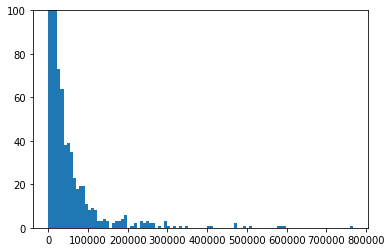

In [34]:
plt.hist(df['tripduration'],bins=100)
plt.ylim(top=100);


         

In [35]:
# Clean up the column names
[col for col in df.columns]


['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [36]:
df.columns = [col.replace(' ','_')for col in df.columns]



In [37]:
df ['starttime'] = pd.to_datetime(df['starttime'])
df ['stoptime'] = pd.to_datetime(df['stoptime'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
tripduration               224736 non-null int64
starttime                  224736 non-null datetime64[ns]
stoptime                   224736 non-null datetime64[ns]
start_station_id           224736 non-null int64
start_station_name         224736 non-null object
start_station_latitude     224736 non-null float64
start_station_longitude    224736 non-null float64
end_station_id             224736 non-null int64
end_station_name           224736 non-null object
end_station_latitude       224736 non-null float64
end_station_longitude      224736 non-null float64
bikeid                     224736 non-null int64
usertype                   224736 non-null object
birth_year                 218019 non-null float64
gender                     224736 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 25.7+ MB


In [43]:
df.dropna(subset=['birth_year'], inplace=True)



In [44]:
df['gender'].value_counts()

1    176526
2     41479
0        14
Name: gender, dtype: int64

In [46]:
df.drop(df[df['gender'] == 0].index, inplace=True)


In [48]:
df['gender'].value_counts()

1    176526
2     41479
Name: gender, dtype: int64

## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [50]:
df.groupby('gender').mean()['tripduration']

gender
1    814.032409
2    991.361074
Name: tripduration, dtype: float64

In [55]:
gender_1_trips = df[df['gender']== 1]['tripduration']
gender_2_trips = df[df['gender']== 2]['tripduration']
len(gender_1_trips) + len(gender_2_trips)


218005

In [56]:
stats.ttest_ind(gender_1_trips, gender_2_trips, equal_var=False)


Ttest_indResult(statistic=-4.802922158264667, pvalue=1.5680482053980446e-06)

In [ ]:
Yes because the Pvalue is less than the T-Test result.  You can reject Hypothesis Null.

## What numeric columns shouldn't be treated as numeric?

In [59]:
df.dtypes




tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                        float64
gender                              int64
dtype: object

**Answer:**

## Dummify the `start station id` Variable

df = pd.get_dummies(df, columns = ['start_station_id'], drop_first=True)




In [66]:
list(df.columns)


['tripduration',
 'starttime',
 'stoptime',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bikeid',
 'usertype',
 'birth_year',
 'gender',
 'start_station_id_79',
 'start_station_id_82',
 'start_station_id_83',
 'start_station_id_116',
 'start_station_id_119',
 'start_station_id_120',
 'start_station_id_127',
 'start_station_id_128',
 'start_station_id_137',
 'start_station_id_143',
 'start_station_id_144',
 'start_station_id_146',
 'start_station_id_147',
 'start_station_id_150',
 'start_station_id_151',
 'start_station_id_152',
 'start_station_id_153',
 'start_station_id_157',
 'start_station_id_160',
 'start_station_id_161',
 'start_station_id_164',
 'start_station_id_167',
 'start_station_id_168',
 'start_station_id_173',
 'start_station_id_174',
 'start_station_id_195',
 'start_station_id_212',
 'start_station_id_216',
 'start_station_id_217',
 'start_station

## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [68]:
df['age'] = 2014 - df['birth_year']



In [70]:
df['age'].value_counts().sort_index().tail(20)



74.0     84
75.0     43
76.0     75
77.0     24
78.0     31
79.0     14
80.0     21
81.0     10
82.0      8
87.0      2
88.0      5
92.0     32
93.0      1
97.0      3
101.0     1
104.0     4
107.0     5
113.0    11
114.0    68
115.0     9
Name: age, dtype: int64

In [71]:
df.drop(df[df['age'] >= 90].index, inplace=True)


## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [73]:
['age', 'usertype', 'gender'] + [col for col in df.columns if 'start_station_id' in col]



['age',
 'usertype',
 'gender',
 'start_station_id_79',
 'start_station_id_82',
 'start_station_id_83',
 'start_station_id_116',
 'start_station_id_119',
 'start_station_id_120',
 'start_station_id_127',
 'start_station_id_128',
 'start_station_id_137',
 'start_station_id_143',
 'start_station_id_144',
 'start_station_id_146',
 'start_station_id_147',
 'start_station_id_150',
 'start_station_id_151',
 'start_station_id_152',
 'start_station_id_153',
 'start_station_id_157',
 'start_station_id_160',
 'start_station_id_161',
 'start_station_id_164',
 'start_station_id_167',
 'start_station_id_168',
 'start_station_id_173',
 'start_station_id_174',
 'start_station_id_195',
 'start_station_id_212',
 'start_station_id_216',
 'start_station_id_217',
 'start_station_id_218',
 'start_station_id_223',
 'start_station_id_224',
 'start_station_id_225',
 'start_station_id_228',
 'start_station_id_229',
 'start_station_id_232',
 'start_station_id_233',
 'start_station_id_236',
 'start_station_id_23

In [82]:
x_cols = ['age', 'gender'] + [col for col in df.columns
                                          if 'start_station_id_' in col]

In [83]:
X = df[x_cols]
y = df['tripduration']


In [84]:
X.head()

,age,gender,start_station_id_79,start_station_id_82,start_station_id_83,start_station_id_116,start_station_id_119,start_station_id_120,start_station_id_127,start_station_id_128,...,start_station_id_2006,start_station_id_2008,start_station_id_2009,start_station_id_2010,start_station_id_2012,start_station_id_2017,start_station_id_2021,start_station_id_2022,start_station_id_2023,start_station_id_3002
0,23.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   train_size=0.75,
                                                   random_state=123)


/Users/jamesproctor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [86]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [88]:
cross_val_score(lr, X_train, y_train, n_jobs=-1,cv=5).mean()

-0.00371810603719549

In [89]:
lr.score(X_test, y_test)


-0.003729964977756906

In [90]:
preds = lr.predict(X_train)

In [92]:
resids = y_train - preds
resids.shape

(163403,)

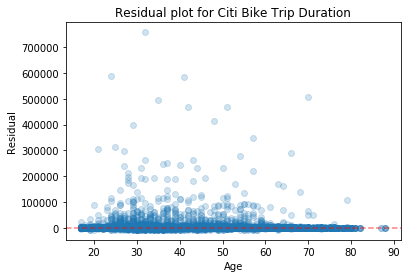

In [93]:
plt.scatter(X_train['age'], resids, alpha=0.2)
plt.axhline(0, color='r', ls= '--', alpha=0.5)
plt.title('Residual plot for Citi Bike Trip Duration')
plt.xlabel('Age')
plt.ylabel('Residual');

In [94]:
import statsmodels.api as sm


/Users/jamesproctor/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [95]:
model = sm.OLS(y_train, X_train).fit()

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:43:34   Log-Likelihood:            -1.6460e+06
No. Observations:              163403   AIC:                         3.293e+06
Df Residuals:                  163073   BIC:                         3.296e+06
Df Model:                         330                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       5.5528      1.258      4.414      0.000       3.087       8.018
gender                  197.6433     36.058      5.481      0.000     126.971     268.316
start_station_id_79     675.0214    275.869      2.447      0.014     134.325    1215.718
start_station_id_82     192.4062    404.973      0.475      0.635    -601.333     986.145
start_station_id_83     401.4717    397.825      1.009      0.313    -378.256    1181.200
start_station_id_116    220.1220    193.265      1.139      0.255    -158.674     598.918
start_station_id_119    238.0405    909.915      0.262      0.794   -1545.373    2021.454
start_station_id_120   1744.2375    704.419      2.476      0.013     363.592    3124.883
start_station_id_127    275.2807    218.622      1.259      0.208    -153.214     703.776
start_station_id_128    271.5193    208.228      1.304      0.192    -136.603     679.642
start_station_id_137    231.8536    308.399      0.752      0.452    -372.603     836.310
start_station_id_143    238.8998    508.004      0.470      0.638    -756.777    1234.577
start_station_id_144    564.2608    737.809      0.765      0.444    -881.829    2010.350
start_station_id_146    162.1056    301.547      0.538      0.591    -428.919     753.131
start_station_id_147    516.1685    231.850      2.226      0.026      61.747     970.590
start_station_id_150    820.4218    294.251      2.788      0.005     243.697    1397.147
start_station_id_151    216.6857    172.430      1.257      0.209    -121.273     554.644
start_station_id_152    173.5313    350.775      0.495      0.621    -513.981     861.043
start_station_id_153    279.8863    220.462      1.270      0.204    -152.214     711.986
start_station_id_157    841.5801    392.676      2.143      0.032      71.943    1611.217
start_station_id_160    453.4683    268.441      1.689      0.091     -72.670     979.606
start_station_id_161    176.5179    205.531      0.859      0.390    -226.318     579.354
start_station_id_164    256.2662    267.642      0.957      0.338    -268.306     780.838
start_station_id_167    234.5460    225.720      1.039      0.299    -207.861     676.953
start_station_id_168    323.4204    193.810      1.669      0.095     -56.443     703.284
start_station_id_173    266.8163    225.044      1.186      0.236    -174.265     707.897
start_station_id_174    988.1400    243.445      4.059      0.000     510.994    1465.286
start_station_id_195   1059.8191    260.049      4.075      0.000     550.129    1569.509
start_station_id_212    344.9358    224.279      1.538      0.124     -94.647     784.518
start_station_id_216    323.0694    799.280      0.404      0.686   -1243.502    1889.641
start_station_id_217    577.8686    704.747      0.820      0.412    -803.420    1959.157
start_station_id_218   

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

In [ ]:
# Males that are between the ages of 18 - 70.  